# Метод K блиайших соседей

# Содержание работы

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
from sklearn.datasets import load_iris


iris = load_iris() 
features = iris.data

data = pd.DataFrame(features, columns = iris.feature_names)
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [10]:
X = data.iloc[:, [0, 2]]
y = iris.target
X.shape, y.shape

((150, 2), (150,))

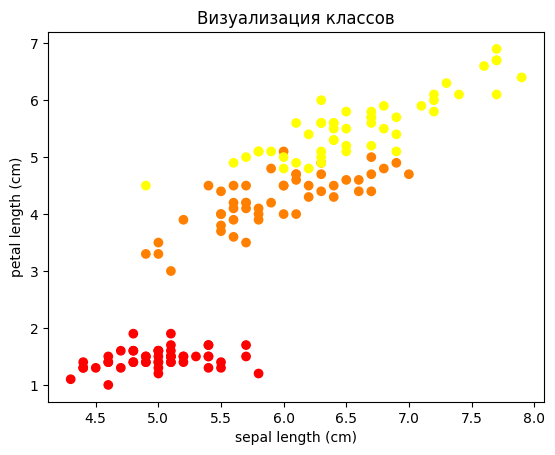

In [11]:
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap='autumn')

plt.title("Визуализация классов")
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.show()

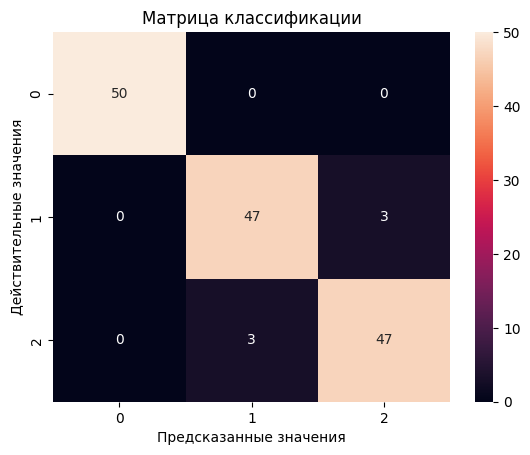

In [12]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import confusion_matrix


scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_scaled, y)

y_pred = knn.predict(X_scaled)


plt.title("Матрица классификации")
sns.heatmap(confusion_matrix(y, y_pred), annot=True, fmt ='d')
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')
plt.show()

In [13]:
from sklearn.metrics import classification_report


print(classification_report(y_pred, y))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.94      0.94      0.94        50
           2       0.94      0.94      0.94        50

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150



/home/evgeniilaz/Python/Stepik/venv/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


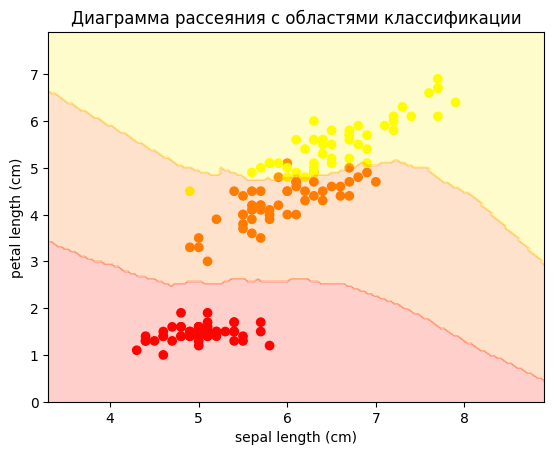

In [14]:
X0 = np.linspace(X.iloc[:, 0].min()-1,X.iloc[:, 0].max()+1, X.shape[0])
X1 = np.linspace(X.iloc[:, 1].min()-1,X.iloc[:, 1].max()+1, X.shape[0])

X0_grid, X1_grid = np.meshgrid(X0, X1)

XX = np.array([X0_grid.ravel(), X1_grid.ravel()]).T

XX_scaled = scaler.transform(XX)
Z = knn.predict(XX_scaled).reshape(X0_grid.shape)


plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap='autumn')
plt.contourf(X0_grid, X1_grid, Z, cmap='autumn', alpha=0.2)

plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.title("Диаграмма рассеяния с областями классификации")
plt.show()

/home/evgeniilaz/Python/Stepik/venv/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


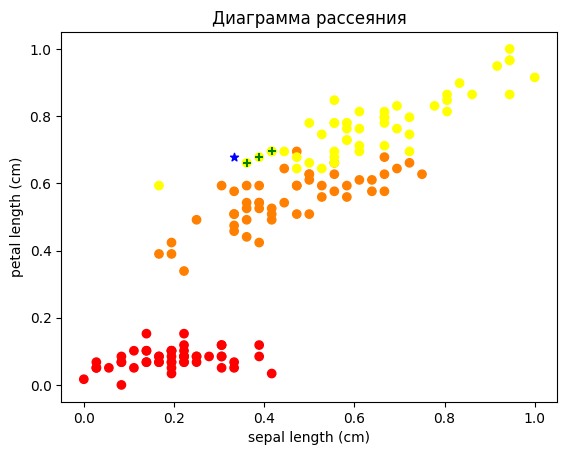

In [ ]:
observation_new = [[5.5, 5]]
observation_new_scaled = scaler.transform(observation_new)
knn.predict(observation_new_scaled)
knn.predict_proba(observation_new_scaled)
distances, indices = knn.kneighbors(observation_new_scaled)


plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='autumn')

plt.scatter(observation_new_scaled[0][0], observation_new_scaled[0][1], marker='*', color='b')

plt.scatter(X_scaled[indices[0]][0][0], X_scaled[indices[0]][0][1], marker='+', color='g')
plt.scatter(X_scaled[indices[0]][1][0], X_scaled[indices[0]][1][1], marker='+', color='g')
plt.scatter(X_scaled[indices[0]][2][0], X_scaled[indices[0]][2][1], marker='+', color='g')

plt.title("Диаграмма рассеяния")
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.show()

/home/evgeniilaz/Python/Stepik/venv/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/evgeniilaz/Python/Stepik/venv/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


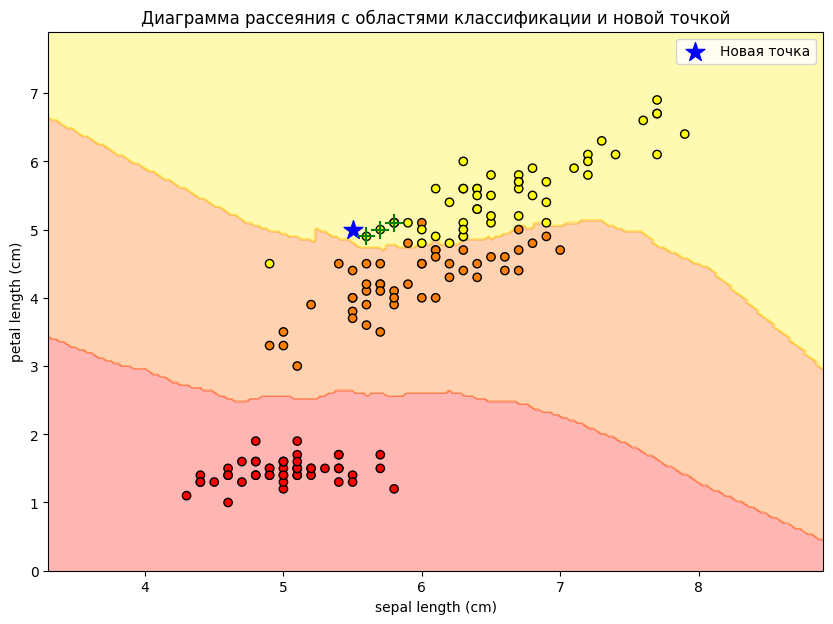

In [ ]:
X0 = np.linspace(X.iloc[:, 0].min()-1, X.iloc[:, 0].max()+1, 200)
X1 = np.linspace(X.iloc[:, 1].min()-1, X.iloc[:, 1].max()+1, 200)

X0_grid, X1_grid = np.meshgrid(X0, X1)

XX = np.array([X0_grid.ravel(), X1_grid.ravel()]).T
XX_scaled = scaler.transform(XX)
Z = knn.predict(XX_scaled).reshape(X0_grid.shape)

observation_new = [[5.5, 5]]
observation_new_scaled = scaler.transform(observation_new)
distances, indices = knn.kneighbors(observation_new_scaled)

plt.figure(figsize=(10, 7))
plt.contourf(X0_grid, X1_grid, Z, cmap='autumn', alpha=0.3)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap='autumn', edgecolor='k')
plt.scatter(observation_new[0][0], observation_new[0][1], marker='*', color='b', s=200, label='Новая точка')

# Ближайшие соседи
for idx in indices[0]:
    plt.scatter(X.iloc[idx, 0], X.iloc[idx, 1], marker='+', color='g', s=150)

plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.title("Диаграмма рассеяния с областями классификации и новой точкой")
plt.legend()
plt.show()

### 2. Попробуйте обучить модель с другим значением k. Визуализируйте области классификации и сравните эффективности модели.


/home/evgeniilaz/Python/Stepik/venv/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/evgeniilaz/Python/Stepik/venv/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/evgeniilaz/Python/Stepik/venv/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/evgeniilaz/Python/Stepik/venv/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/evgeniilaz/Python/Stepik/venv/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


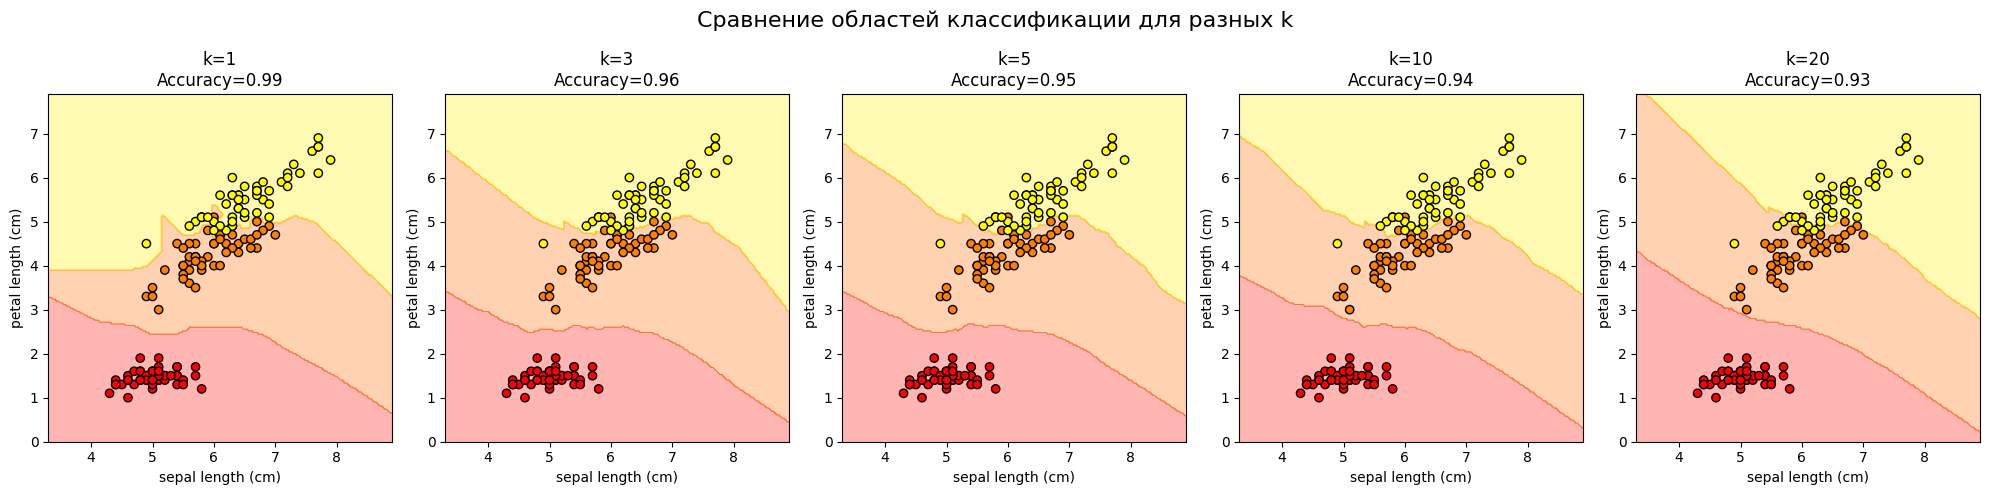

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

k_values = [1, 3, 5, 10, 20]

fig, axes = plt.subplots(1, len(k_values), figsize=(20, 5))
fig.suptitle('Сравнение областей классификации для разных k', fontsize=16)

X0 = np.linspace(X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1, 200)
X1 = np.linspace(X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1, 200)
X0_grid, X1_grid = np.meshgrid(X0, X1)
XX = np.array([X0_grid.ravel(), X1_grid.ravel()]).T

for idx, k in enumerate(k_values):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_scaled, y)

    Z = knn.predict(scaler.transform(XX)).reshape(X0_grid.shape)

    y_pred = knn.predict(X_scaled)
    acc = accuracy_score(y, y_pred)

    # Визуализация
    ax = axes[idx]
    ax.contourf(X0_grid, X1_grid, Z, cmap='autumn', alpha=0.3)
    ax.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap='autumn', edgecolor='k')
    ax.set_title(f"k={k}\nAccuracy={acc:.2f}")
    ax.set_xlabel('sepal length (cm)')
    ax.set_ylabel('petal length (cm)')

plt.tight_layout()
plt.show()


### 3. Подвигайте новое наблюдение в последнем пункте методических указаний. Сдвиньте его за пределы области определения выборки. Как меняется нормализованное значение?

/home/evgeniilaz/Python/Stepik/venv/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Оригинальная точка: [4 1], Нормализованная точка: [-0.08333333  0.        ]
Оригинальная точка: [6 4], Нормализованная точка: [0.47222222 0.50847458]
Оригинальная точка: [8 6], Нормализованная точка: [1.02777778 0.84745763]


/home/evgeniilaz/Python/Stepik/venv/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


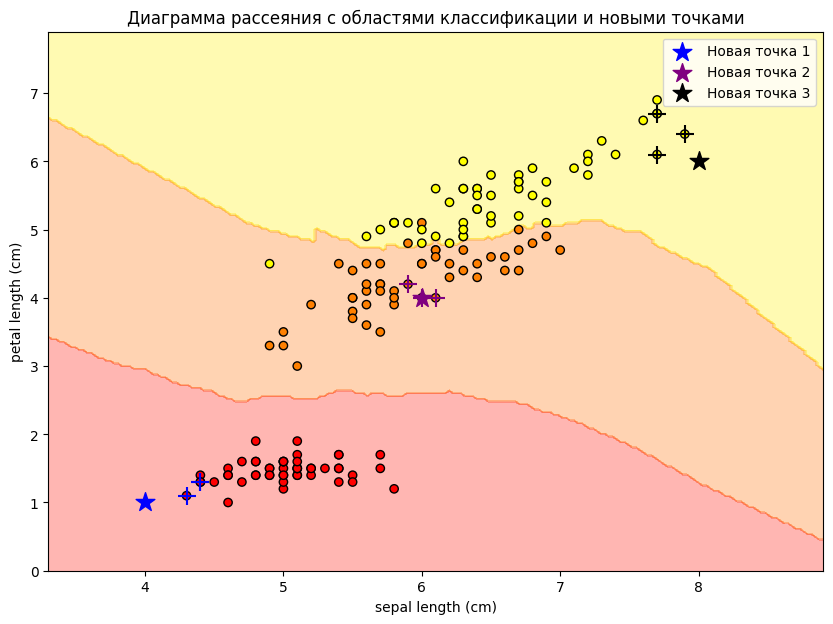

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Масштабирование признаков
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Обучение модели
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_scaled, y)

# Сетка для построения областей классификации
X0 = np.linspace(X.iloc[:, 0].min()-1, X.iloc[:, 0].max()+1, 200)
X1 = np.linspace(X.iloc[:, 1].min()-1, X.iloc[:, 1].max()+1, 200)

X0_grid, X1_grid = np.meshgrid(X0, X1)

XX = np.array([X0_grid.ravel(), X1_grid.ravel()]).T
XX_scaled = scaler.transform(XX)
Z = knn.predict(XX_scaled).reshape(X0_grid.shape)

# Новые наблюдения
new_points = np.array([
    [4, 1],    # первая точка
    [6, 4],   # за пределами выборки
    [8, 6]   # ещё дальше
])

# Нормализация новых точек
new_points_scaled = scaler.transform(new_points)
distances, indices = knn.kneighbors(new_points_scaled)

# Вывод нормализованных значений
for original, scaled in zip(new_points, new_points_scaled):
    print(f"Оригинальная точка: {original}, Нормализованная точка: {scaled}")

# Построение графика
plt.figure(figsize=(10, 7))
plt.contourf(X0_grid, X1_grid, Z, cmap='autumn', alpha=0.3)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap='autumn', edgecolor='k')


colors = ['b', 'purple', 'black']
labels = ['Новая точка 1', 'Новая точка 2', 'Новая точка 3']

for i, point in enumerate(new_points):
    plt.scatter(point[0], point[1], marker='*', color=colors[i], s=200, label=labels[i])
    for idx in indices[i]:
        plt.scatter(X.iloc[idx, 0], X.iloc[idx, 1], marker='+', color=colors[i], s=150)

plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.title("Диаграмма рассеяния с областями классификации и новыми точками")
plt.legend()
plt.show()

### 4. Поэкспериментируйте с разными метриками расстояния. Визуализируйте ближайших соседей нового объекта при разных метриках расстояния.

/home/evgeniilaz/Python/Stepik/venv/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/evgeniilaz/Python/Stepik/venv/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/evgeniilaz/Python/Stepik/venv/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/evgeniilaz/Python/Stepik/venv/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/evgeniilaz/Python/Stepik/venv/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


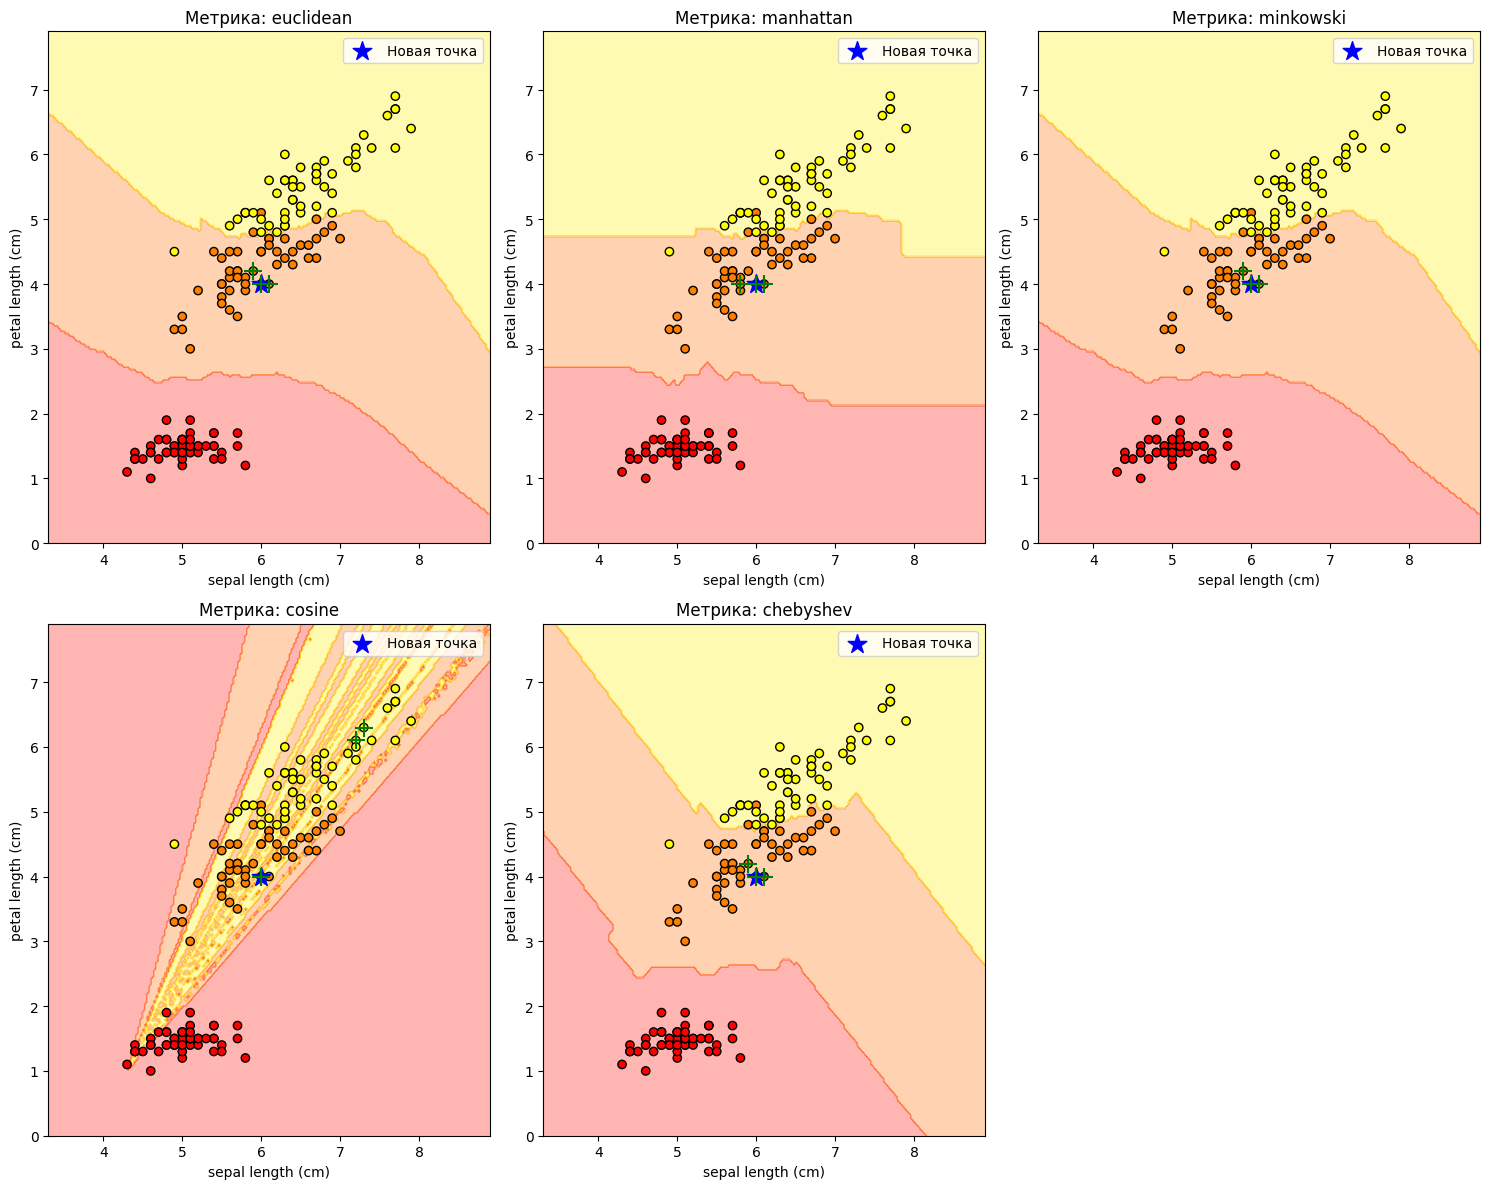

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier 


scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

observation_new = [[6, 4]]

metrics = ['euclidean', 'manhattan', 'minkowski', 'cosine', 'chebyshev']

plt.figure(figsize=(15, 12))

for i, metric in enumerate(metrics, 1):
    knn = KNeighborsClassifier(n_neighbors=3, metric=metric)
    knn.fit(X_scaled, y)
    
    observation_new_scaled = scaler.transform(observation_new)
    distances, indices = knn.kneighbors(observation_new_scaled)
    
    X0 = np.linspace(X.iloc[:, 0].min()-1, X.iloc[:, 0].max()+1, 200)
    X1 = np.linspace(X.iloc[:, 1].min()-1, X.iloc[:, 1].max()+1, 200)
    X0_grid, X1_grid = np.meshgrid(X0, X1)

    XX = np.array([X0_grid.ravel(), X1_grid.ravel()]).T
    XX_scaled = scaler.transform(XX)
    Z = knn.predict(XX_scaled).reshape(X0_grid.shape)
    
    plt.subplot(2, 3, i)
    plt.contourf(X0_grid, X1_grid, Z, cmap='autumn', alpha=0.3)
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap='autumn', edgecolor='k')

    plt.scatter(observation_new[0][0], observation_new[0][1], marker='*', color='b', s=200, label='Новая точка')

    for idx in indices[0]:
        plt.scatter(X.iloc[idx, 0], X.iloc[idx, 1], marker='+', color='g', s=150)

    plt.title(f"Метрика: {metric}")
    plt.xlabel('sepal length (cm)')
    plt.ylabel('petal length (cm)')
    plt.legend()

plt.tight_layout()
plt.show()

Мы экспериментируем с пятью метриками:

Euclidean: стандартная евклидова метрика.

Manhattan: манхэттенское расстояние.

Minkowski: более общий случай, который можно настроить через параметр p.

Cosine: косинусное расстояние.

Chebyshev: максимальное расстояние по любой оси.

### 5. Обучите модель на полном датасете. Сравните ее эффективность с описанной в методических указаниях. Попробуйте разные значения k.

In [47]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

k_values = [1, 3, 5, 7, 9]
results = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_scaled, y)
    y_pred = knn.predict(X_scaled)
    accuracy = accuracy_score(y, y_pred)
    results.append((k, accuracy))

for k, accuracy in results:
    print(f"Accuracy для k={k}: {accuracy:.4f}")

Accuracy для k=1: 1.0000
Accuracy для k=3: 0.9667
Accuracy для k=5: 0.9600
Accuracy для k=7: 0.9667
Accuracy для k=9: 0.9733


### 6. Попробуйте в модели на полном датасете взвешенный алгоритм (аргумент weights объекта KNeighborsClassifier). Сравние его точность с равномерным вариантом.

In [48]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

k_values = [1, 3, 5, 7, 9]
results_uniform = []
results_weighted = []

for k in k_values:
    knn_weighted = KNeighborsClassifier(n_neighbors=k, weights='distance')
    knn_weighted.fit(X_scaled, y)
    y_pred_weighted = knn_weighted.predict(X_scaled)
    accuracy_weighted = accuracy_score(y, y_pred_weighted)
    results_weighted.append((k, accuracy_weighted))

print("\nРезультаты для взвешенных весов:")
for k, accuracy in results_weighted:
    print(f"Accuracy для k={k}: {accuracy:.4f}")


Результаты для взвешенных весов:
Accuracy для k=1: 1.0000
Accuracy для k=3: 1.0000
Accuracy для k=5: 1.0000
Accuracy для k=7: 1.0000
Accuracy для k=9: 1.0000


Модель стала еще точнее, accurancy 1 свидетельствует о явном переобучении

### 9. Постройте график точности (accuracy) модели в зависимости от значения k. Сделайте вывод.

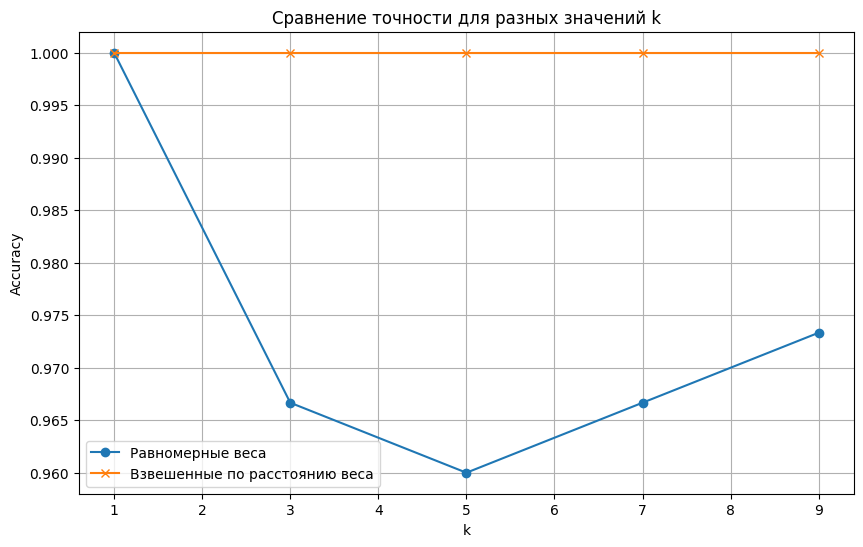

In [51]:
plt.figure(figsize=(10, 6))
plt.plot([k for k, _ in results], [accuracy for _, accuracy in results], marker='o', label='Равномерные веса')
plt.plot([k for k, _ in results_weighted], [accuracy for _, accuracy in results_weighted], marker='x', label='Взвешенные по расстоянию веса')
plt.title('Сравнение точности для разных значений k')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

### 10. Выберите датасет и постройте регрессию при помощи метода ближайших соседей.

In [54]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score


data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

knn_regressor = KNeighborsRegressor(n_neighbors=5)  # можно поиграться с k
knn_regressor.fit(X_train, y_train)

y_pred = knn_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Среднеквадратичная ошибка (MSE): {mse:.4f}")
print(f"Коэффициент детерминации (R^2): {r2:.4f}")

Среднеквадратичная ошибка (MSE): 0.4013
Коэффициент детерминации (R^2): 0.6942


# Контрольные вопросы

### Чем отличается стандартизация и минмакс-нормализация данных?
    Стандартизация делает среднее 0 и стандартное отклонение 1, минмакс-нормализация приводит данные к диапазону [0, 1].

### Есть ли другие методы нормализации данных?
    Да, например RobustScaler для устойчивости к выбросам и Normalizer для нормировки длины векторов.

### Когда применять какие методы?
    Стандартизацию используют для линейных моделей, минмакс — для методов на расстояниях, RobustScaler — при выбросах.

### В чем смысл параметра k в алгоритме ближайших соседей? Как его выбирать?
    k — число соседей для решения. Маленький k ведет к переобучению, большой — к недообучению. Подбирают через кросс-валидацию.

### Чем отличается взвешенный и равномерный вариант метода ближайших соседей? Когда применять какой?
    В равномерном варианте все соседи равны, во взвешенном ближние важнее. Взвешенный вариант применяют, если важна степень близости.

### Почему нормализованное по минимаксному методу значение может быть больше 1?
    Если новая точка выходит за диапазон обучающих данных.

### Что такое метрики расстояния и как они влияют на работу метода ближайших соседей?
    Метрика определяет, как измеряется близость точек. Разные метрики меняют форму областей классификации и точность модели.